In [2]:
import pandas as pd
import numpy as np
from pandas import json_normalize
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import json
import scipy.stats as stats


### Read csv into dataframe

In [3]:
df = pd.read_csv (r'playlists_file.csv',sep='\t')
df.head()

,artwork_url,created_at,description,display_date,duration,embeddable_by,genre,id,is_album,kind,...,secret_token,set_type,sharing,tag_list,title,track_count,tracks,uri,user,user_id
0,NaN,2014-11-04T22:06:21Z,NaN,2014-11-04T22:06:21Z,7564109,all,Electronic,57959426,False,playlist,...,NaN,NaN,public,"Dubstep House Moombahton ""Electro House"" Worko...",Best #Number 1 Workout Playlist--#2,26,"158625286,64412298,167822607,10195732,10574697...",https://api.soundcloud.com/playlists/57959426,101485422,101485422
1,https://i1.sndcdn.com/artworks-WHgW7HZHgyYidvI...,2017-10-22T17:24:57Z,TheSoundYouNeed Ultimate Compilations Spotify ...,2017-10-22T17:24:57Z,13398495,all,NaN,361952771,False,playlist,...,NaN,NaN,public,Chill sleep Chillout Party Relax study TheSoun...,TheSoundYouNeed,58,"102955650,250078338,155002757,190294789,976418...",https://api.soundcloud.com/playlists/361952771,214279944,214279944
2,NaN,2015-05-26T03:36:31Z,"we get it, you don't.. stay trill. soni i love u",2015-05-26T03:36:31Z,8766602,all,TRILL,111086596,False,playlist,...,NaN,NaN,public,bliss sunset lovers no sleep love life fuck cathy,sunset lovers summer 2015&2014,35,"111244800,115594113,182044677,242136202,139205...",https://api.soundcloud.com/playlists/111086596,149233883,149233883
3,https://i1.sndcdn.com/artworks-000197067830-yk...,2016-11-30T16:58:23Z,NaN,2016-11-30T17:27:07Z,4861300,all,Chill,279673872,False,playlist,...,NaN,NaN,public,RainyDay Soul Study Relax,Rainy Day,24,"209486977,121239554,172878983,207294611,140558...",https://api.soundcloud.com/playlists/279673872,79168303,79168303
4,https://i1.sndcdn.com/artworks-000548151837-vg...,2017-05-01T06:41:21Z,NaN,2017-06-09T10:15:20Z,6582370,all,Chill,319658000,False,playlist,...,NaN,NaN,public,"Chill workout Chillout Relax Best Of ""Chill Ci...",Best Of Chill City,32,"323733248,611109894,198800140,227358350,718958...",https://api.soundcloud.com/playlists/319658000,214279944,214279944


### Boxplot track_count

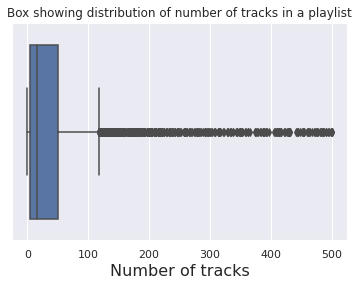

<Figure size 432x288 with 0 Axes>

In [12]:
ax = sns.boxplot(x=df['track_count'])
#ax.set(xlim=(0, 100)) # adjust this value
sns.set(style="darkgrid")
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Number of tracks', fontsize=16)
plt.title('Box showing distribution of number of tracks in a playlist')
plt.show()
plt.clf()


### Distplot duration

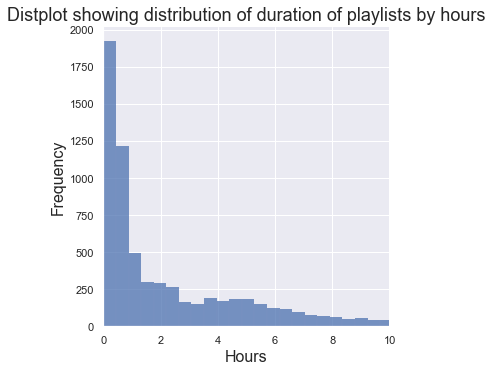

<Figure size 720x576 with 0 Axes>

In [52]:
ax = sns.displot(x=df['duration']/1000/60/60)
ax.set(xlim=(0, 10)) # adjust this value
sns.set(style="darkgrid")
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Hours', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Distplot showing distribution of duration of playlists by hours', fontsize=18)
plt.show()
plt.clf()

### Correlation matrix: Duration, Likes count, Reposts count and Track count

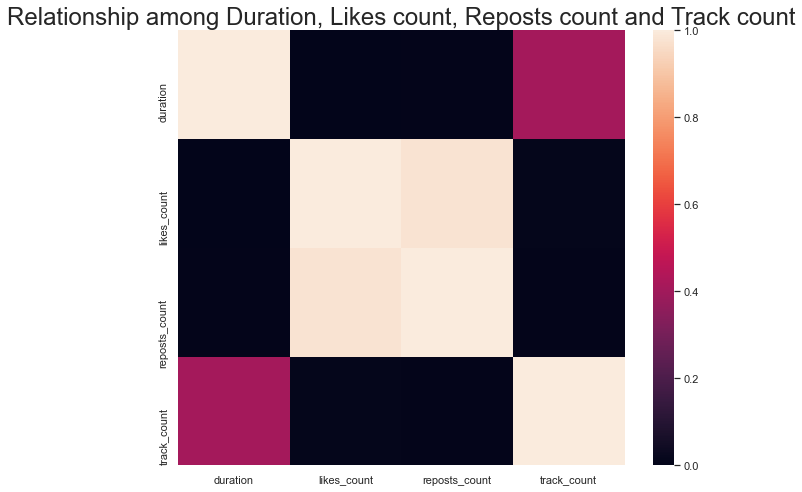

In [47]:
df_corr = df[['duration','likes_count','reposts_count','track_count']]

sns.heatmap(df_corr.corr())
sns.set(rc={'figure.figsize':(8,10)})
plt.title("Relationship among Duration, Likes count, Reposts count and Track count",size = 24)
plt.show()

*Câu hỏi: Liệu rằng thời lượng(`duration`), lượt thích(`likes_count`), lượt đăng lại(`reposts_count`) và số lượng bài hát(`track_count`) có mối liên hệ gì với nhau hay không?

*Chuẩn bị dữ liệu: Các trường dữ liệu cần thiết:
    
        `duration`: thời lượng của 1 playlist
        `likes_count`: số lượt thích của 1 playlist
        `reposts_count`: số lượt đăng lại của 1 playlist
        `track_count`: số lượng bài hát trong 1 playlist
        
*Biểu đồ: Sử dụng biểu đồ nhiệt để biểu diễn sự tương quan giữa các biến

*Dự đoán: Các playlist có càng nhiều bài hát thì sẽ có thời lượng càng dài. Thông thường, người ta chọn nghe playlist là vì muốn nghe được nhiều bài hát cùng chủ đề, vì vậy số lượng bài hát trong 1 playlist càng nhiều thì sẽ có càng nhiều lượt thích. Và khi người ta đã thích thì khả năng playlist được đăng lại sẽ cao hơn.

*Kết quả: 
    
    _Số lượng bài hát trong 1 playlist có vẻ không ảnh hưởng nhiều đến thời lượng của 1 playlist. Nguyên nhân có thể là do các bài hát trong 1 playlist có thời lượng ngắn
    
    _Số lượt thích của 1 playlist có ảnh hưởng đến lượt đăng lại của playlist đó (đúng như dự đoán). Tuy nhiên, thời lượng của 1 playlist lại hoàn toàn không liên quan đến lượt thích của playlist đó. Ta có thể lý giải điều này là vì người dùng có thể không thích một số bài hát trong playlist đó, hoặc có thể là do thời lượng của playlist dài quá, người dùng nghe xong thì quên bấm like
    

### Correlation matrix:  Track count Vs. Likes count, Reposts count 

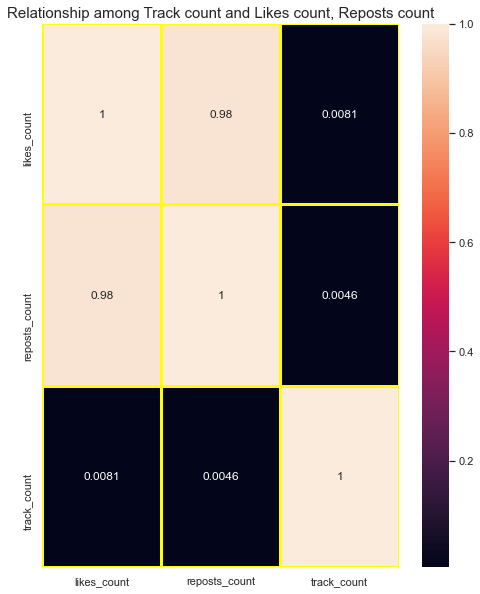

In [6]:
sns.heatmap(df_corr.corr(),annot=True,linewidths=2,
                linecolor='yellow')
sns.set(rc={'figure.figsize':(8,10)})
plt.title("Relationship among Track count and Likes count, Reposts count",size = 15)
plt.show()

### Nhận xét: 
- Có thể làm tăng số lượt like và repost của một playlist bằng cách tăng số lượng track trong playlist đó được hay không?
- **Phân tích**:
    + Sử dụng 3 trường dữ liệu likes_count (lưu trữ số lượt yêu thích của các user tương tác), reposts_count (lưu trữ số lượng reup các tác phẩm), track_count (lưu trữ số lượng bài hát trong một playlist)
    + Cả 3 trường đều không có mất mát dữ liệu
    + Kiểu dữ liệu: int64 => Không có bất thường trong kiểu dữ liệu
- **Ý nghĩa biểu đồ**:
    + Chọn Heatmap để trực quan hoá vì nó phù hợp với nhu cầu thể hiện tốt mối quan hệ của ba trường likes_count, reposts_count và track_count
    + Trước khi trực quan hoá, dự đoán câu trả lời là track_count sẽ có quan hệ đồng biến với likes_count và reposts_count. Có nghĩa khi số lượng bài hát tăng cao đồng nghĩa mức độ phổ biến sẽ cao hơn, sẽ có nhiều cơ hội tương tác với người dùng hơn
    + Sau khi trực quan hoá, ta thấy mối quan hệ giữa reposts_count và likes_count hợp lý hơn cả. Khi heatmap cho thấy rõ ràng sự mờ nhạt